<a href="https://colab.research.google.com/github/EnasZakiya17/Sistem-Kendali-2022/blob/main/474649_Enas_E_Zakiya_Y_Fullstate_Feedback.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TUGAS FULLSTATE FEEDBACK
## Nama : Enas Erliana Zakiya Yudhana
## NIM : 21/474649/PA/20498

![image.png](attachment:image.png)

In [16]:
!pip install control

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
import numpy as np
import control as ctl
import control.matlab as matlab
import matplotlib.pyplot as plt

A = np.array([[0,1,0],[0,0,1],[-1,-5,-6]])
B = np.array([[0],[0],[1]])
#matriks A & B untuk state space

print("A = \n", A)
print("B = \n", B)

K = np.array([[4200,653,33]])
#ukuran matrix K --> jumlah aksi x jumlah state
#x1 --> orde 0, x2 --> orde 1. x3 --> orde 2, u --> orde 3
#kolom 1 --> hubungan antara x1 dan u
#kolom 2 --> hubungan antara x2 dan u
#kolom 3 --> hubungan antara x3 dan u

#K
#bilangan pertama untuk mengurangi rise time jika nilai semakin besar
#bilangan kedua untuk mengurangi undershoot jika nilai semakin besar
#bilangan ketiga untuk mengurangi osilasi jika nilai semakin besar

print("K = \n", K)

A = 
 [[ 0  1  0]
 [ 0  0  1]
 [-1 -5 -6]]
B = 
 [[0]
 [0]
 [1]]
K = 
 [[4200  653   33]]


In [18]:
sistem = ctl.ss((A-B*K),np.identity(3),np.identity(3),np.identity(3))
print("Sistem dalam SS = \n",sistem)
#state space baru dengan gain K 

Sistem dalam SS = 
 <LinearIOSystem>: sys[4]
Inputs (3): ['u[0]', 'u[1]', 'u[2]']
Outputs (3): ['y[0]', 'y[1]', 'y[2]']
States (3): ['x[0]', 'x[1]', 'x[2]']

A = [[ 0.000e+00  1.000e+00  0.000e+00]
     [ 0.000e+00  0.000e+00  1.000e+00]
     [-4.201e+03 -6.580e+02 -3.900e+01]]

B = [[1. 0. 0.]
     [0. 1. 0.]
     [0. 0. 1.]]

C = [[1. 0. 0.]
     [0. 1. 0.]
     [0. 0. 1.]]

D = [[1. 0. 0.]
     [0. 1. 0.]
     [0. 0. 1.]]



In [19]:
t0 = 0
t_end = 5
dt = 0.01
#pengaturan cuplikan respon

t = np.arange(t0,t_end+dt,dt)     # deret waktu 0 - 5 detik dengan kenaikan dt (0,01)
inisial = matlab.initial(sistem,t,np.array([1,0,0]));
#inisial[0] --> y-out-nya (respon sistem), inisial[1] --> time, inisial[3] --> respon per state
#ambil output dari ss sistem untuk diplot
x1 = [1,0,0]@np.transpose(inisial[0])
x2 = [0,1,0]@np.transpose(inisial[0])
x3 = [0,0,1]@np.transpose(inisial[0])

Respon x1
Rise time =  0.27
steady state error =  -1.1977472149572935e-28


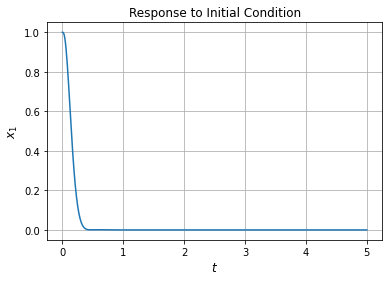

In [20]:
#plot respon x1
fig,ax=plt.subplots()
ax.plot(t,x1)
ax.set_ylabel('$x_1$',fontsize=12)
ax.set_xlabel('$t$',fontsize=12)
ax.grid()
ax.set_title('Response to Initial Condition')
print("Respon x1")
print("Rise time = ",t[next(i for i in range(20,len(x1)-1) if x1[i]<0.1)]-t[0])
print("steady state error = ",x1[-1])

Respon x2
Rise time =  0.4
steady state error =  2.9700606386333017e-28


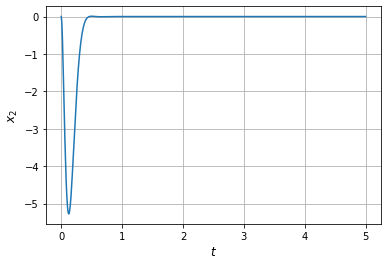

In [21]:
#plot respon x2
fig,ax=plt.subplots()
ax.plot(t,x2)
ax.set_ylabel('$x_2$',fontsize=12)
ax.set_xlabel('$t$',fontsize=12)
ax.grid()
print("Respon x2")
print("Rise time = ",t[next(i for i in range(20,len(x2)-1) if x2[i]>-0.1)]-t[0])
print("steady state error = ",x2[-1])

Respon x3
Rise time =  0.49
steady state error =  3.508074677135348e-26


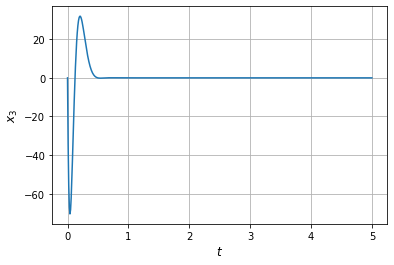

In [22]:
#plot respon x3
fig,ax=plt.subplots()
ax.plot(t,x3)
ax.set_ylabel('$x_3$',fontsize=12)
ax.set_xlabel('$t$',fontsize=12)
ax.grid()
print("Respon x3")
print("Rise time = ",t[next(i for i in range(20,len(x3)-1) if x3[i]<0.1)]-t[0])
print("steady state error = ",x3[-1])